In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [3]:
stk_data = yf.download("RELIANCE.NS", start="2013-06-01", end="2022-02-11")
stk_data

C:\Users\admin\AppData\Local\Temp\ipykernel_13060\4010520275.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2013-06-01", end="2022-02-11")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2013-06-03,167.620468,171.332833,167.056686,170.981802,14165128
2013-06-04,165.982346,170.152124,165.758971,168.194884,14752690
2013-06-05,170.620148,171.109458,166.046155,166.046155,12748842
2013-06-06,168.492706,171.024351,167.663017,170.194661,17113393
2013-06-07,166.705658,170.620137,166.152527,168.960729,9420701
...,...,...,...,...,...
2022-02-04,1065.005981,1072.840675,1060.346346,1069.437239,11061241
2022-02-07,1058.519165,1076.655277,1052.991451,1069.894201,10714467


In [7]:
stk_data = stk_data[["Close","High","Low","Open"]]

In [9]:
stk_data

Price,Close,High,Low,Open
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2013-06-03,167.620468,171.332833,167.056686,170.981802
2013-06-04,165.982346,170.152124,165.758971,168.194884
2013-06-05,170.620148,171.109458,166.046155,166.046155
2013-06-06,168.492706,171.024351,167.663017,170.194661
2013-06-07,166.705658,170.620137,166.152527,168.960729
...,...,...,...,...
2022-02-04,1065.005981,1072.840675,1060.346346,1069.437239
2022-02-07,1058.519165,1076.655277,1052.991451,1069.894201


In [55]:
column =  stk_data[['Close']]

In [57]:
#performing Minmax scaler
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data= Ms.fit_transform(column)
print("Len:",data.shape)

Len: (2144, 1)


In [59]:
# Convert back to DataFrame for indexing
scaled_column = pd.DataFrame(data, index=column.index, columns=['Close'])

In [61]:
scaled_column

,Close
Date,
2013-06-03,0.001514
2013-06-04,0.000000
2013-06-05,0.004286
2013-06-06,0.002320
2013-06-07,0.000668
...,...
2022-02-04,0.830885
2022-02-07,0.824890
2022-02-08,0.841335


In [63]:
training_size =  round(len(data ) * 0.80)
print(training_size)
X_train=data[:training_size]
X_test=data[training_size:] 
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data[:training_size]
y_test=data[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1715
X_train length: (1715, 1)
X_test length: (429, 1)
y_train length: (1715, 1)
y_test length: (429, 1)


C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Best smoothing level α: 0.9999999850988388


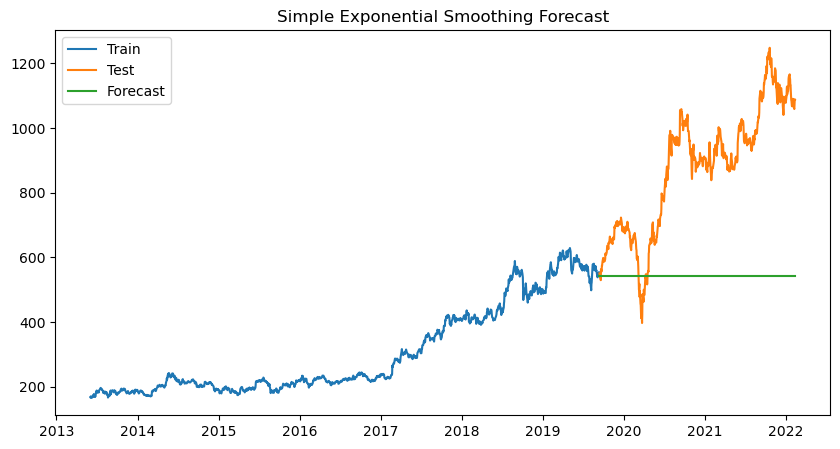

In [81]:

# Split into train and test
train = scaled_column[:-600]   # everything except the last 600 values
test = scaled_column[-600:]  # the last 600 values

# Fit Simple Exponential Smoothing model
model = SimpleExpSmoothing(train)

result = model.fit(optimized=True)
print("Best smoothing level α:", result.model.params['smoothing_level'])

#result = model.fit(smoothing_level=0.5, optimized=False)  # You can set smoothing_level or let it optimize

# Forecast
forecast = result.forecast(steps=600)

# Inverse Transform
train_inv = Ms.inverse_transform(train)
test_inv = Ms.inverse_transform(test)
forecast_inv = Ms.inverse_transform(forecast.values.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train_inv, label='Train')
plt.plot(test.index, test_inv, label='Test')
plt.plot(test.index, forecast_inv, label='Forecast')
plt.legend()
plt.title('Simple Exponential Smoothing Forecast')
plt.show()

In [83]:
forecast_inv

array([[543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543.61633317],
       [543